The basis of this project is to measure a real world phenomenon across one hundred data points with four different variables, using a synthesised data set.

Recently my workplace offered all employees access to vaccination for the flu and I decided to try model my project on this concept.  

My project is based on the idea of 100 staff members who avail of a flu vaccine and the variables to represent this data are - 
* Their age  
* The department they work in 
* Their gender
* If they had the vaccine the previous year

I did some online reading to determine they types of variables that these data are.  The Age veriable is a [continuous numerical value](http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/Hstructures/structures_c2.html) which means that it may contain any value within a particular range, in this case, that range is from age 18 to 65 (which is approximately the age range of working adults).  Department of work and gender is a nominal categorical values, in that they have [two or more categories, but there is no intrinsic ordering to the categories](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/).  Whether the workers have been previously vaccinated or not is a type of [nominal scale](http://users.monash.edu/~smarkham/resources/scaling.htm) which means that the two categories - Yes and No - have no order or structure and there is no distance between the categories. 

If I was to perform this analysis on actual data, rather than synthesised, I would carry out a survey of vaccinated staff and collate their responses to inform the results.  

The first step I took was to randomly generate a set of 100 integers to represent the 100 vaccinated staff members and another set of 100 randomly generated integers in a range from 18 to 65 to represent the ages of these staff numbers. I decided to fix the seed for all uses of the Numpy package in my code for the sake of consistency and reproducibility of the results. I then used a scatterplot to display the spread of the age variable across the simulated data on vaccinated staff members. 

Text(0,0.5,'Age')

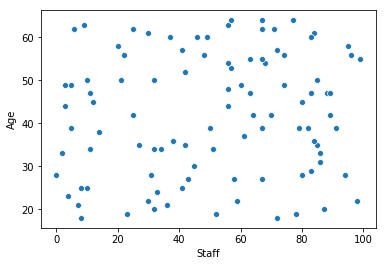

In [4]:
import pandas as pd#imports pandas library 
import numpy as np#imports numpy package
import seaborn as sns#imports seaborn package
import matplotlib.pyplot as plt #imports matplotlib library
 
np.random.seed(170380)#fixing seed for reproducibility
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(18, 65, 100)#generates an array of 100 numbers in a range from 18 to 65
sns.scatterplot(staff,staff_ages)#plots a scatterplot showing Staff on the x axis and Age on the Y axis
plt.xlabel("Staff")#labels the x axis of the scatterplot
plt.ylabel("Age")#labels the y axis of the scatterplot

In order to describe the shape of the distribution of staff ages in a clearer way, I decided to also plot this as a histogram -

Text(0,0.5,'Frequency')

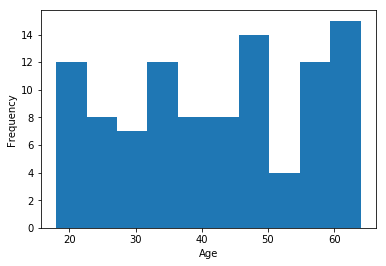

In [5]:
plt.hist(staff_ages)#plots histogram of Age
plt.xlabel("Age")#labels x axis
plt.ylabel("Frequency")#labels y axis 

The histogram above describes the distribution of the data as continuous normal. To derive the mean age of the data set I used the [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html) function - 

In [6]:
np.mean(staff_ages, dtype=np.integer)#to print mean as integer rather than float 

42

Next I decided I needed to randomly assign these 100 vaccinated staff members to 4 different departments. I figured the best way to do this was to create a Pandas Dataframe and then generate the random values within that. After some online research I found [this post on stackoverflow.com](https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python) that recommended using the multinomial distribution from the [numpy.random.multinomial function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html) from NumPy's Random Sampling package. 

In [7]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])#create a list of departmental name labels 
np.random.seed(170380)#fixing the seed for reproducibility 
#to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.multinomial(100,[4/25.]*4, size=1)) #https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
df.columns = (["Accounts", "Engineering", "Administration", "Facilities"])#constructs a Pandas DataFrame with the department names as column headers
df.index = (["Total"])#names the index of the DataFrame as Total 
print (df)#displays DataFrame

       Accounts  Engineering  Administration  Facilities
Total        16           19              16          49


To display the uptake of the vaccine, I used a barplot to chart the observations of vaccinated staff per department - 

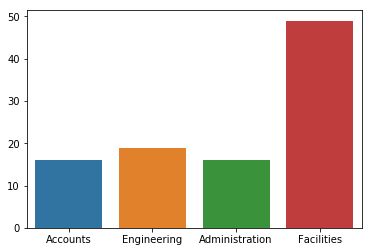

In [8]:
#to chart a bar plot that visually desdribes the vaccine uptake
sns.barplot(data=df)

In [9]:
#allocate department
department = (["Accounts", "Engineering", "Administration", "Facilities"])
np.random.seed(170380)
df1 = pd.DataFrame(np.random.choice (department, 100))
#allocate gender
gender = ["Male", "Female"]
np.random.seed(170380)
df2 = pd.DataFrame(np.random.choice(gender, 100))
#allocate if previously vaccinated 
vaccine = ["Yes", "No"]
np.random.seed(170380)
df3 = pd.DataFrame(np.random.choice(vaccine, 100))
#create a DataFrame from randomly generated NumPy array representing staff ages
df4 = pd.DataFrame(staff_ages)

In [10]:
merged_df = pd.concat([df4, df1, df2, df3], axis=1)#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
pd.set_option('display.max_row', 100)#https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
merged_df.columns = ["Age", "Department", "Gender", "Previous Vaccine"]#https://stackoverflow.com/questions/34338374/pandas-control-new-column-names-when-merging-two-dataframes
merged_df

,Age,Department,Gender,Previous Vaccine
0,62,Engineering,Female,No
1,60,Administration,Male,Yes
2,58,Accounts,Male,Yes
3,53,Engineering,Female,No
4,39,Facilities,Female,No
5,52,Administration,Male,Yes
6,27,Administration,Male,Yes
7,58,Facilities,Female,No
8,23,Administration,Male,Yes
9,56,Facilities,Female,No


In [15]:
merged_df.describe()

,Age
count,100.000000
mean,42.110000
std,14.052495
min,18.000000
25%,29.750000
50%,42.000000
75%,55.000000
max,64.000000
